# Education

## Imports

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from census import Census 
from us import states 
import numpy as np
import contextily as ctx

In [2]:
from Globals import CENSUS_KEY

In [3]:
# Set API key
c = Census(CENSUS_KEY)

## Variables

In [4]:
# Grabbing a few variables of interest pertaining to the economic vitality of an area
fields = {
    "NAME" : "Name"
    , "B15003_001E" : "Total Population"
    , "B15003_002E" : "No schooling completed"
    , "B15003_003E" : "Nursery school"
    , "B15003_004E" : "Kindergarten"
    , "B15003_005E" : "1st grade"
    , "B15003_006E" : "2nd grade"
    , "B15003_007E" : "3rd grade"
    , "B15003_008E" : "4th grade"
    , "B15003_009E" : "5th grade"
    , "B15003_010E" : "6th grade"
    , "B15003_011E" : "7th grade"
    , "B15003_012E" : "8th grade"
    , "B15003_013E" : "9th grade"
    , "B15003_014E" : "10th grade"
    , "B15003_015E" : "11th grade"
    , "B15003_016E" : "12th grade, no diploma"
    , "B15003_017E" : "Regular high school diploma"
    , "B15003_018E" : "GED or alternative credential"
    , "B15003_019E" : "Some college, less than 1 year"
    , "B15003_020E" : "Some college, 1 or more years, no degree"
    , "B15003_021E" : "Associate's degree"
    , "B15003_022E" : "Bachelor's degree"
    , "B15003_023E" : "Master's degree"
    , "B15003_024E" : "Professional school degrees"
    , "B15003_025E" : "Doctorate degree"
}

## Download three years

In [5]:
def nm_dl(year):
    data = c.acs5.state_county_tract(
        fields = list(fields.keys()),
        state_fips = states.NM.fips,
        county_fips = "*",
        tract = "*",
        year = year
        )
    return data

In [6]:
nm_demo_2022_df = pd.DataFrame(nm_dl(2022))
nm_demo_2019_df = pd.DataFrame(nm_dl(2019))
nm_demo_2016_df = pd.DataFrame(nm_dl(2016))

In [7]:
for df in [nm_demo_2022_df, nm_demo_2019_df, nm_demo_2016_df]: 
    df.rename(columns=fields, inplace=True)

## Download geometries and merge

In [8]:
nm_tract_2022 = gpd.read_file('../../../localData/Census/nm_tract_2022.gpkg').to_crs(epsg = 32113)[['GEOID', 'geometry']]
nm_tract_2019 = gpd.read_file('../../../localData/Census/nm_tract_2019.gpkg').to_crs(epsg = 32113)[['GEOID', 'geometry']]
nm_tract_2016 = gpd.read_file('../../../localData/Census/nm_tract_2016.gpkg').to_crs(epsg = 32113)[['GEOID', 'geometry']]

In [9]:
for df in [nm_demo_2016_df, nm_demo_2019_df, nm_demo_2022_df]: 
    df['GEOID'] = (df.state + df.county + df.tract)

In [134]:
nm_demo_2022 = nm_tract_2022.merge(nm_demo_2022_df, on='GEOID')
nm_demo_2019 = nm_tract_2019.merge(nm_demo_2019_df, on='GEOID')
nm_demo_2016 = nm_tract_2016.merge(nm_demo_2016_df, on='GEOID')

In [135]:
nm_demo_2022.describe()

,Total Population,No schooling completed,Nursery school,Kindergarten,1st grade,2nd grade,3rd grade,4th grade,5th grade,6th grade,...,"12th grade, no diploma",Regular high school diploma,GED or alternative credential,"Some college, less than 1 year","Some college, 1 or more years, no degree",Associate's degree,Bachelor's degree,Master's degree,Professional school degrees,Doctorate degree
count,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,...,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000
mean,2342.986928,33.594771,0.509804,0.348039,1.325163,3.084967,8.390523,3.978758,6.161765,34.078431,...,39.519608,498.887255,109.065359,149.380719,392.437908,210.269608,376.968954,215.022876,43.843137,45.380719
std,1067.129929,46.972665,3.312166,2.443759,7.774259,13.959233,24.747288,11.233915,14.529105,60.224868,...,46.761623,289.274224,87.973041,113.004934,220.629729,149.396026,297.645167,204.468661,68.567061,79.839777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1589.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,298.500000,46.000000,66.750000,243.000000,104.000000,158.750000,62.000000,0.000000,0.000000
50%,2235.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,...,23.000000,456.500000,89.000000,124.500000,347.500000,176.000000,297.000000,160.500000,17.000000,18.000000
75%,2966.500000,45.000000,0.000000,0.000000,0.000000,0.000000,2.250000,0.000000,3.000000,45.250000,...,56.000000,656.500000,151.250000,208.000000,513.250000,284.250000,527.500000,307.250000,55.000000,55.000000
max,6880.000000,291.000000,34.000000,31.000000,107.000000,158.000000,315.000000,100.000000,109.000000,440.000000,...,296.000000,1629.000000,552.000000,700.000000,1362.000000,1022.000000,1782.000000,1204.000000,514.000000,714.000000


In [136]:
dfs = [nm_demo_2022, nm_demo_2019, nm_demo_2016]

In [137]:
LTHighSchool = ['No schooling completed', 'Nursery school', 'Kindergarten', 
            '1st grade', '2nd grade', '3rd grade', '4th grade', 
            '5th grade', '6th grade', '7th grade', '8th grade', 
            '9th grade', '10th grade', '11th grade', '12th grade, no diploma']
HighSchool = ['Regular high school diploma', 'GED or alternative credential', 
             'Some college, less than 1 year', 'Some college, 1 or more years, no degree']

In [138]:
for df in dfs:
    df['LTHighSchool'] = df.loc[:, LTHighSchool].sum(axis=1)
    df['HighSchool'] = df.loc[:, LTHighSchool].sum(axis=1)
    df.drop(columns=LTHighSchool+HighSchool, inplace=True)
    df['area skm'] = df.area / 1e6

In [141]:
nm_demo_2022.iloc[0]

GEOID                                                                  35009000308
geometry                         POLYGON ((780721.5363953095 383402.00779081177...
Name                                   Census Tract 3.08; Curry County; New Mexico
Total Population                                                            2133.0
Associate's degree                                                           273.0
Bachelor's degree                                                            524.0
Master's degree                                                              179.0
Professional school degrees                                                   60.0
Doctorate degree                                                              35.0
state                                                                           35
county                                                                         009
tract                                                                       000308
LTHi

In [140]:
for df in dfs:
    n_cols = list(df.select_dtypes(include=np.number).columns)
    col_names = ['d_'+ col for col in n_cols]
    for col, name in zip(n_cols, col_names): 
        df[name] = df[col] / df['area skm']

In [142]:
nm_demo_2022.to_file('../../../localData/Census/nm_edu_2022.gpkg', layer='Tract')
nm_demo_2019.to_file('../../../localData/Census/nm_edu_2019.gpkg', layer='Tract')
nm_demo_2016.to_file('../../../localData/Census/nm_edu_2016.gpkg', layer='Tract')

## Group by county and state

In [143]:
def to_county(df):
    (df.drop(columns=['Name','tract','state', 'GEOID'])
       .dissolve('county', aggfunc='sum')
       .reset_index())
    return df
def to_state(df):
    (df.drop(columns=['Name','tract','county', 'GEOID'])
       .dissolve('state', aggfunc='sum')
       .reset_index())
    return df

In [145]:
(to_county(nm_demo_2022)
 .to_file('../../../localData/Census/nm_edu_2022.gpkg', layer='County'))
(to_county(nm_demo_2019)
 .to_file('../../../localData/Census/nm_edu_2019.gpkg', layer='County'))
(to_county(nm_demo_2016)
 .to_file('../../../localData/Census/nm_edu_2016.gpkg', layer='County'))
(to_state(nm_demo_2022)
 .to_file('../../../localData/Census/nm_edu_2022.gpkg', layer='State'))
(to_state(nm_demo_2019)
 .to_file('../../../localData/Census/nm_edu_2019.gpkg', layer='State'))
(to_state(nm_demo_2016)
 .to_file('../../../localData/Census/nm_edu_2016.gpkg', layer='State'))

## Clip Albuquerque and VTR by predefined shape

In [146]:
abq_shp = gpd.read_file('../../../data/local/abq_shp.gpkg').to_crs(nm_demo_2022.crs)
vtr_shp = gpd.read_file('../../../data/local/vtr_shp.gpkg').to_crs(nm_demo_2022.crs)

In [147]:
(nm_demo_2022.clip(abq_shp)
 .to_file('../../../localData/Census/nm_edu_2022.gpkg', layer='Albuquerque'))
(nm_demo_2019.clip(abq_shp)
 .to_file('../../../localData/Census/nm_edu_2019.gpkg', layer='Albuquerque'))
(nm_demo_2016.clip(abq_shp)
 .to_file('../../../localData/Census/nm_edu_2016.gpkg', layer='Albuquerque'))

In [148]:
(nm_demo_2022.clip(vtr_shp)
 .to_file('../../../localData/Census/nm_edu_2022.gpkg', layer='VTR'))
(nm_demo_2019.clip(vtr_shp)
 .to_file('../../../localData/Census/nm_edu_2019.gpkg', layer='VTR'))
(nm_demo_2016.clip(vtr_shp)
 .to_file('../../../localData/Census/nm_edu_2016.gpkg', layer='VTR'))

In [149]:
abq_2022 = gpd.read_file('../../../localData/Census/nm_edu_2022.gpkg', 
                        layer='Albuquerque')

In [46]:
abq_2022.loc[:, abq_2022.columns.str.startswith('d_')].columns

Index(['d_Total Population', 'd_Associate's degree', 'd_Bachelor's degree',
       'd_Master's degree', 'd_Professional school degrees',
       'd_Doctorate degree', 'd_LTHighSchool', 'd_HighSchool'],
      dtype='object')

In [168]:
col_names[:-1]

['d_Total Population',
 "d_Associate's degree",
 "d_Bachelor's degree",
 "d_Master's degree",
 'd_Professional school degrees',
 'd_Doctorate degree',
 'd_LTHighSchool',
 'd_HighSchool']

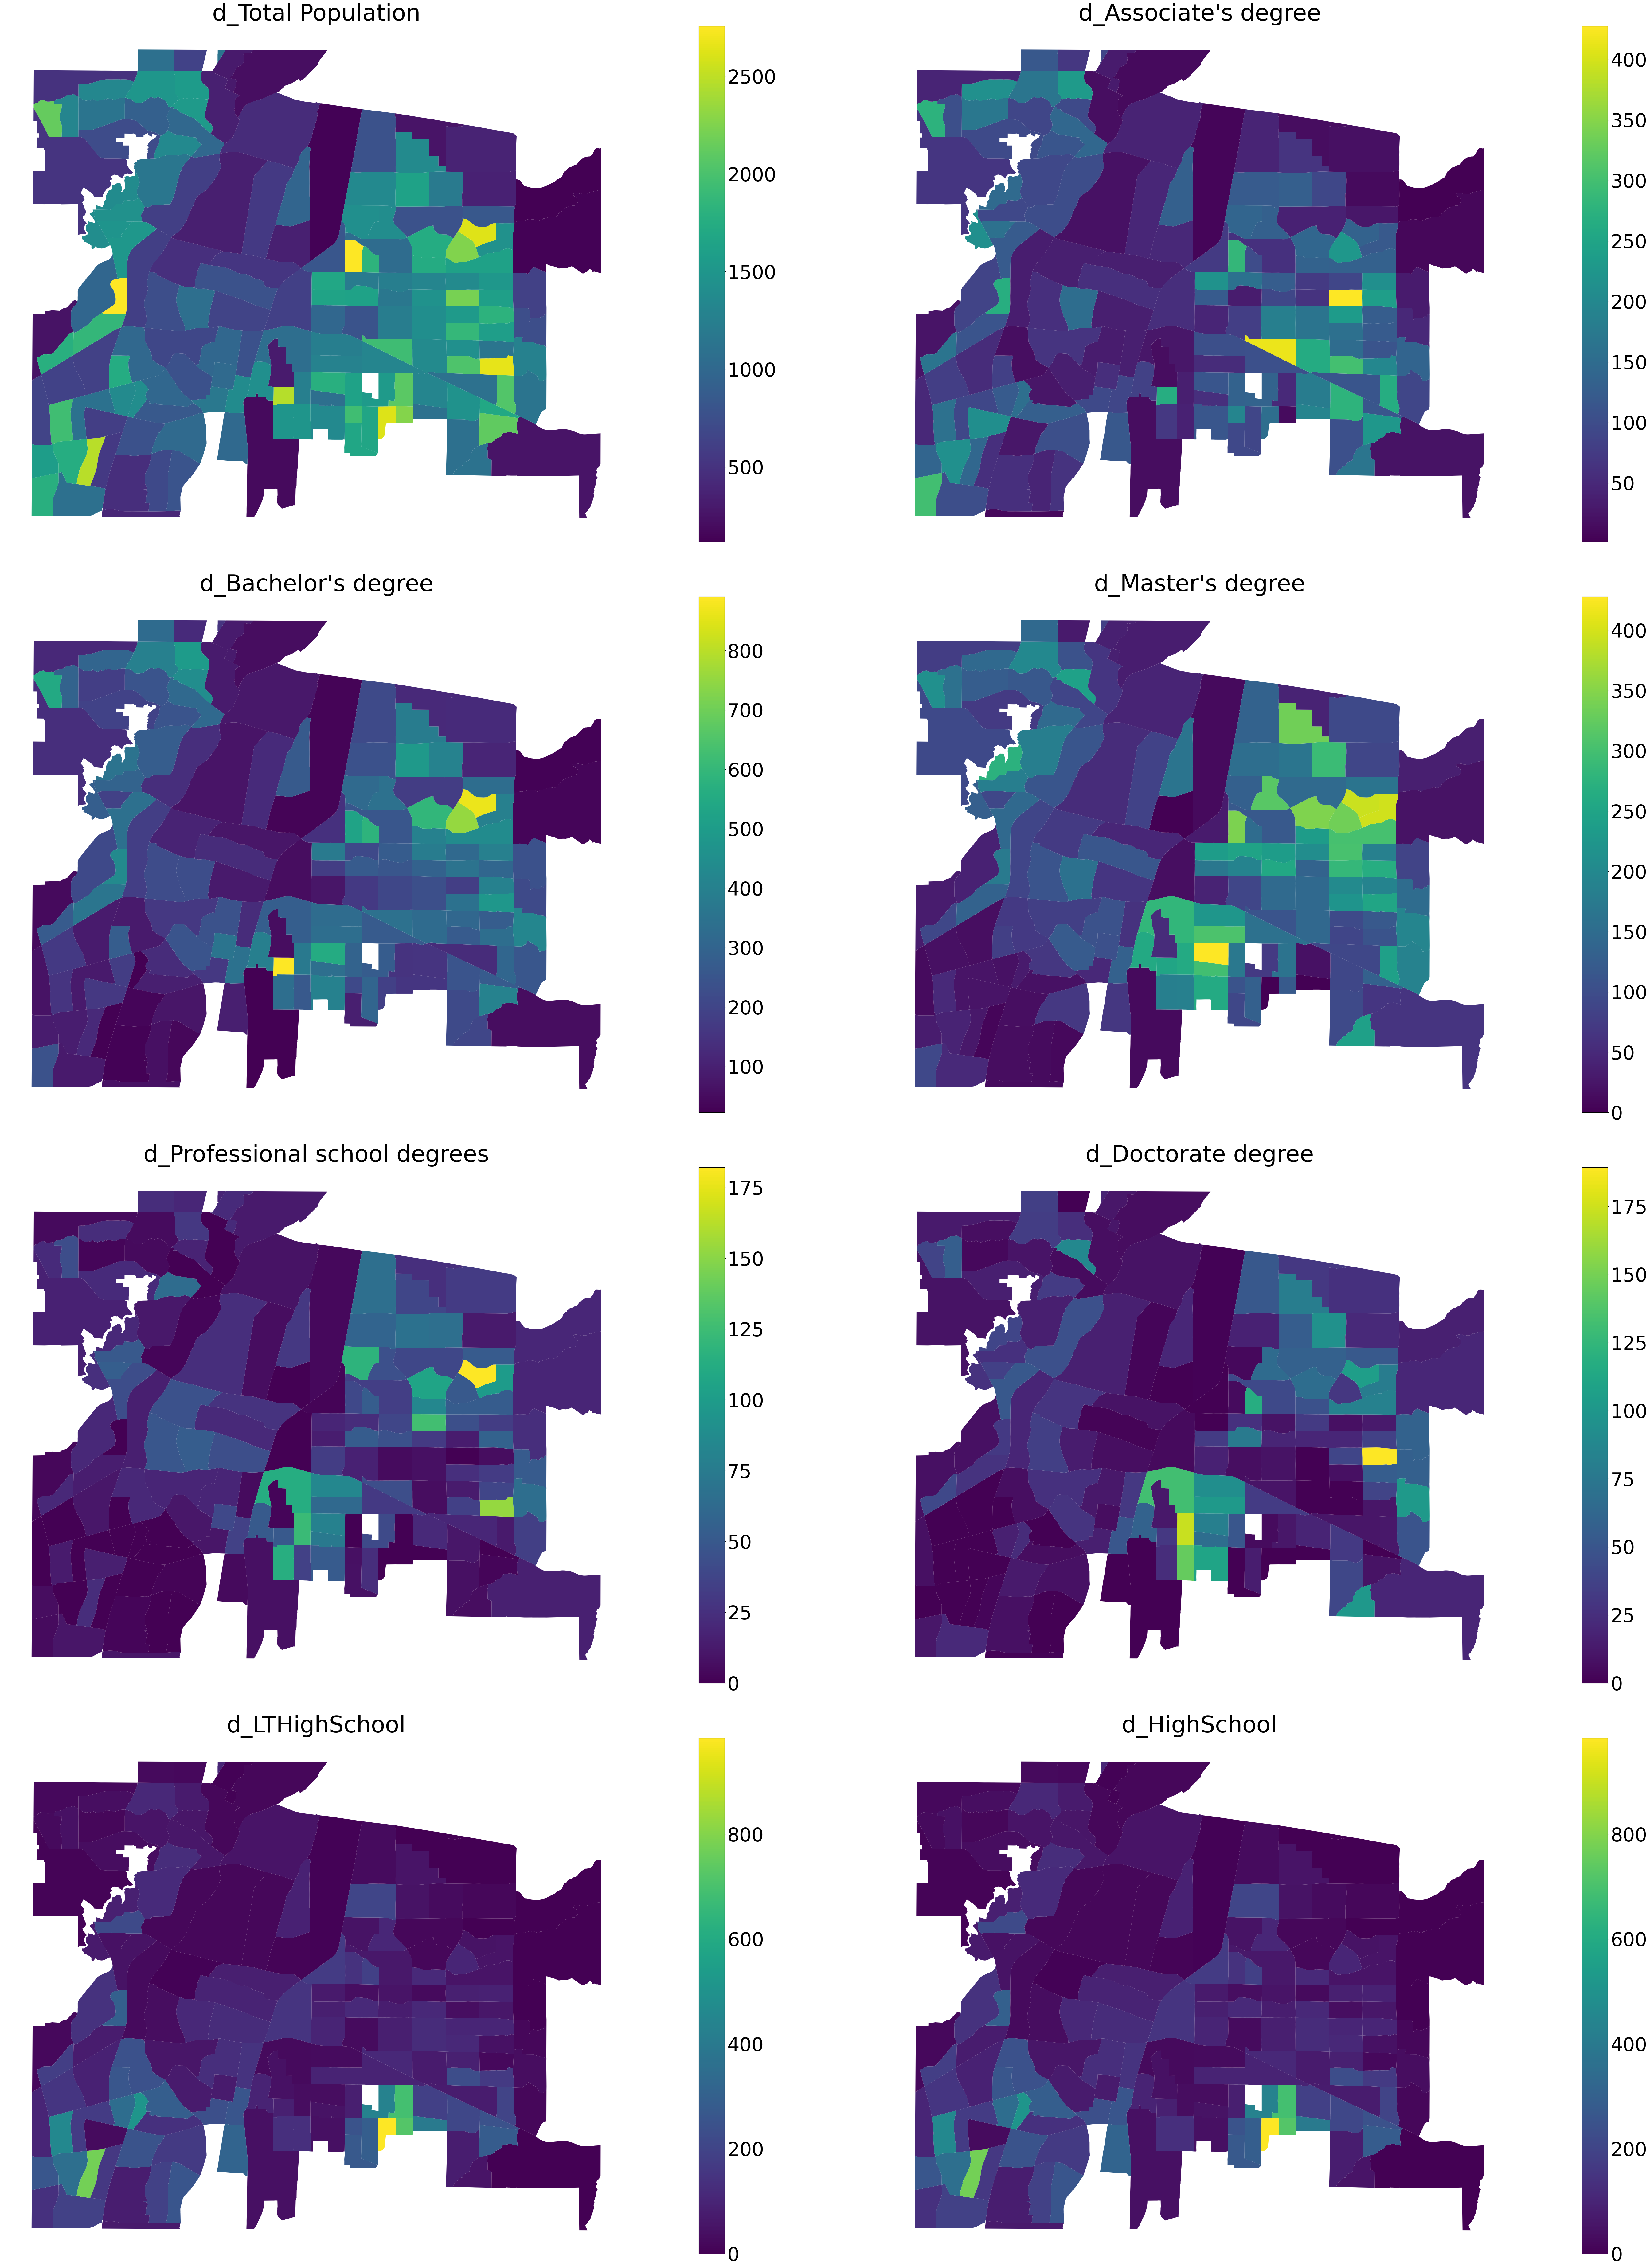

In [169]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(75,75), layout='tight')

axes = axes.flatten()

# Setting the font size
plt.rcParams['font.size'] = '45'
plt.style.use('seaborn-v0_8-dark-palette')
#cols = [c for c in abq_2022.columns if c.startswith('d_')]

# Plotting each of the extracted variables in a subplot
for ind, col in enumerate(col_names[:-1]):
    ax = axes[ind]
    abq_2022[abq_2022['d_Total Population'] > 100].plot(column=col,
                  ax = ax
                  #, scheme = "quantiles"
                  , linewidth=0, cmap="viridis", 
                    legend=True
                  #, legend_kwds={'loc': 'center left','bbox_to_anchor':(1,0.5),'fmt': "{:.0f}"}
                 ) 
    ax.set_axis_off()
    ax.set_title(col)
plt.subplots_adjust(wspace=None, hspace=None)
plt.show()

## Get Country-wide data

In [170]:
us_demo_2022_dl = c.acs5.state_county(
    fields = list(fields.keys()),
    state_fips = "*",
    county_fips = "*",
    year = 2022
    )
us_demo_2019_dl = c.acs5.state_county(
    fields = list(fields.keys()),
    state_fips = "*",
    county_fips = "*",
    year = 2019
    )
us_demo_2016_dl = c.acs5.state_county(
    fields = list(fields.keys()),
    state_fips = "*",
    county_fips = "*",
    year = 2016
    )

In [171]:
us_demo_2022_df = pd.DataFrame(us_demo_2022_dl)
us_demo_2019_df = pd.DataFrame(us_demo_2019_dl)
us_demo_2016_df = pd.DataFrame(us_demo_2016_dl)

In [172]:
for df in [us_demo_2022_df, us_demo_2019_df, us_demo_2016_df]: 
    df.rename(columns=fields, inplace=True)

In [174]:
us_tract_2022 = gpd.read_file('../../../data/local/tl_2022_us_county.zip')[['GEOID', 'geometry']]
us_tract_2019 = gpd.read_file('../../../data/local/tl_2019_us_county.zip')[['GEOID', 'geometry']]
us_tract_2016 = gpd.read_file('../../../data/local/tl_2016_us_county.zip')[['GEOID', 'geometry']]

In [175]:
for df in [us_demo_2022_df, us_demo_2019_df, us_demo_2016_df]: 
    df['GEOID'] = (df.state + df.county)

In [193]:
us_demo_2022 = us_tract_2022.merge(us_demo_2022_df, on='GEOID').to_crs(5070)
us_demo_2019 = us_tract_2019.merge(us_demo_2019_df, on='GEOID').to_crs(5070)
us_demo_2016 = us_tract_2016.merge(us_demo_2016_df, on='GEOID').to_crs(5070)

In [194]:
dfs = [us_demo_2022, us_demo_2019, us_demo_2016]

In [195]:
for df in dfs:
    df['LTHighSchool'] = df.loc[:, LTHighSchool].sum(axis=1)
    df['HighSchool'] = df.loc[:, LTHighSchool].sum(axis=1)
    df.drop(columns=LTHighSchool+HighSchool, inplace=True)
    df['area skm'] = df.area / 1e6

In [198]:
for df in dfs:
    n_cols = list(df.select_dtypes(include=np.number).columns)
    col_names = ['d_'+ col for col in n_cols]
    for col, name in zip(n_cols, col_names): 
        df[name] = df[col] / df['area skm']

In [199]:
us_demo_2022.iloc[0]

GEOID                                                                        31039
geometry                         POLYGON ((-45725.23786110873 2101634.267245485...
Name                                                       Cuming County, Nebraska
Total Population                                                            6124.0
Associate's degree                                                           744.0
Bachelor's degree                                                           1064.0
Master's degree                                                              305.0
Professional school degrees                                                   62.0
Doctorate degree                                                              36.0
state                                                                           31
county                                                                         039
LTHighSchool                                                                 482.0
High

In [200]:
us_demo_2022.to_file('../../../data/Census/us_edu_2022.gpkg')
us_demo_2019.to_file('../../../data/Census/us_edu_2019.gpkg')
us_demo_2016.to_file('../../../data/Census/us_edu_2016.gpkg')